<a href="https://colab.research.google.com/github/KendiSookie/Financial-Inclusion/blob/main/Financial_Inclusion_by_Lisa_Kendi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**THE STATE OF FINANCIAL INCLUSION IN KENYA,TANZANIA,UGANDA AND RWANDA** 

# 1.0) Project Overview
**Financial inclusion** means that individuals and businesses have access to useful and affordable financial products and services that meet their needs.

Being able to have access to a transaction account is a first step toward broader financial inclusion since a transaction account allows people to store money, and send and receive payments. A transaction account serves as a gateway to other financial services, which is why ensuring that people worldwide can have access to a transaction account continues to be an area of  focus for the World Bank Group (WBG). 

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

# 1.2) Problem Statement

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.


#1.3) Objectives
#a) Main objective
The objective of this project is to develop a predictive model that determines which individuals are most likely to have or use a bank account.

#b) Specific objectives

1. To create a machine learning model that will make the predictions.



# 1.4)Specifying the question


1.   Which individuals are most likely to have or use a bank account

# 1.5) Defining the metric of success
Project will be considered successful if we train a machine learning model that will be able to predict which type of individuals are likely to have or use a bank account

#1.6) Understanding the question

The dataset we have describes ~23,524 variables. Information on the car type, make, customer age and start of policy are in the data.

Below are the various variables in our dataset;

1. **Country** :	Country
2. **Year**  :	Year in concideration
3.  **gender_of_respondent** :	Gender of the respondent
4. **Respondent Age**:	Age of the respondent
5. **household_size**:	Size of household
6.	**Type of Location** :	The type of location of an individual
7.	**marital_status** :	Marital status of the respondent


#1.7) Experimental Design Taken

1. Loading the required libraries
2. Reading and previewing dataset
3. Tidying the data
4. Exploratory Data Analysis
5. Implementing the solution 
6. Challenging the solution.
7. Conclusion
8. Reccomendation

# 1.8) Data Relevance
The dataset is relevant for the analysis process.This dataset provides a complete overview of **12,000** respondents who have bank accountss and who do not.

The dataset was extracted from Kaggle

# 2) Reading the data

In [ ]:
#Importing the libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Reading the dataset
Financial=pd.read_csv('/content/drive/MyDrive/Financial Dataset - 1.csv')

# 3) Understanding the dataset

In [ ]:
#Reading the first 5 values of the dataset
Financial.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
#Reading the last 5 values of the dataset
Financial.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [ ]:
#Getting the shape of the dataset
Financial.shape

(23524, 13)

**Observation**


The out put shows that our dataset has 23524 rows and 13 columns.This shows that our dataset is a large one.

In [ ]:
#Checking on the columns 
Financial.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

**Observation**

This shows that some of the columns are wrongly labeled hence correcting.

In [ ]:
#Checking for duplicates
Financial.duplicated().sum()

0

**Observation**

There are no duplicates

In [ ]:
#Checking for the number and value of unique values in each column
for column in Financial.columns:
  print(column)
  print(Financial[column].nunique())#getting the number of unique values
  print(Financial[column].unique())#getting a view of the unique values


country
4
['Kenya' 'Rwanda' 'Tanzania' nan 'Uganda']
year
6
[2018 2029 2056 2016 2039 2017]
uniqueid
8735
['uniqueid_1' 'uniqueid_2' 'uniqueid_3' ... 'uniqueid_8757'
 'uniqueid_8758' 'uniqueid_8759']
Has a Bank account
2
['Yes' 'No' nan]
Type of Location
2
['Rural' 'Urban' nan]
Cell Phone Access
2
['Yes' 'No' nan]
household_size
21
[ 3.  5.  8.  7.  1.  6.  4. 10.  2. 11.  9. 12. 16. 15. 13. 14. 21. nan
  0. 18. 17. 20.]
Respondent Age
85
[ 24.  70.  26.  34.  32.  42.  54.  76.  40.  69.  64.  31.  38.  47.
  27.  48.  25.  21.  18.  22.  58.  55.  62.  29.  35.  45.  67.  19.
  80.  66.  50.  33.  28.  51.  16.  17.  30.  37.  59.  65.  46.  56.
  52.  23.  43.  49.  44.  72.  53.  63.  39.  81.  78.  36.  20.  60.
  95.  71.  57.  85.  68.  41.  61.  75.  86.  73.  nan  93.  74.  88.
  90.  77.  84.  82.  89.  79.  83.  94.  87.  92.  91.  98.  97.  96.
  99. 100.]
gender_of_respondent
2
['Female' 'Male' nan]
The relathip with head
6
['Spouse' 'Head of Household' 'Other relative' 'C

**Observation**

This shows the number of unique values and values.Where we see that the country variable has presence of a null value,for the year variable we have very special year values 2029,2039 and 2056 which might be error inputs.

In [ ]:
#Checking the information of the dataset
Financial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


**Observation**

We see that some of the columns have missing values.And that the variable datatypes have to be changed.This is because we only have one variable that is an integer and 2 floats the rest are objects.Also we notice that there are some columns that have been misspelled

In [ ]:
Financial.nunique()

country                      4
year                         6
uniqueid                  8735
Has a Bank account           2
Type of Location             2
Cell Phone Access            2
household_size              21
Respondent Age              85
gender_of_respondent         2
The relathip with head       6
marital_status               5
Level of Educuation          7
Type of Job                 10
dtype: int64

**Observation**

This shows the number of unique values in each variable

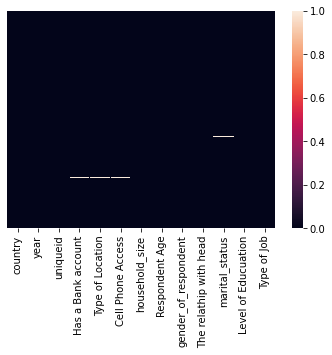

In [ ]:
#Checking the heatmap for where there are null values
sns.heatmap(Financial.isnull(),yticklabels=False)

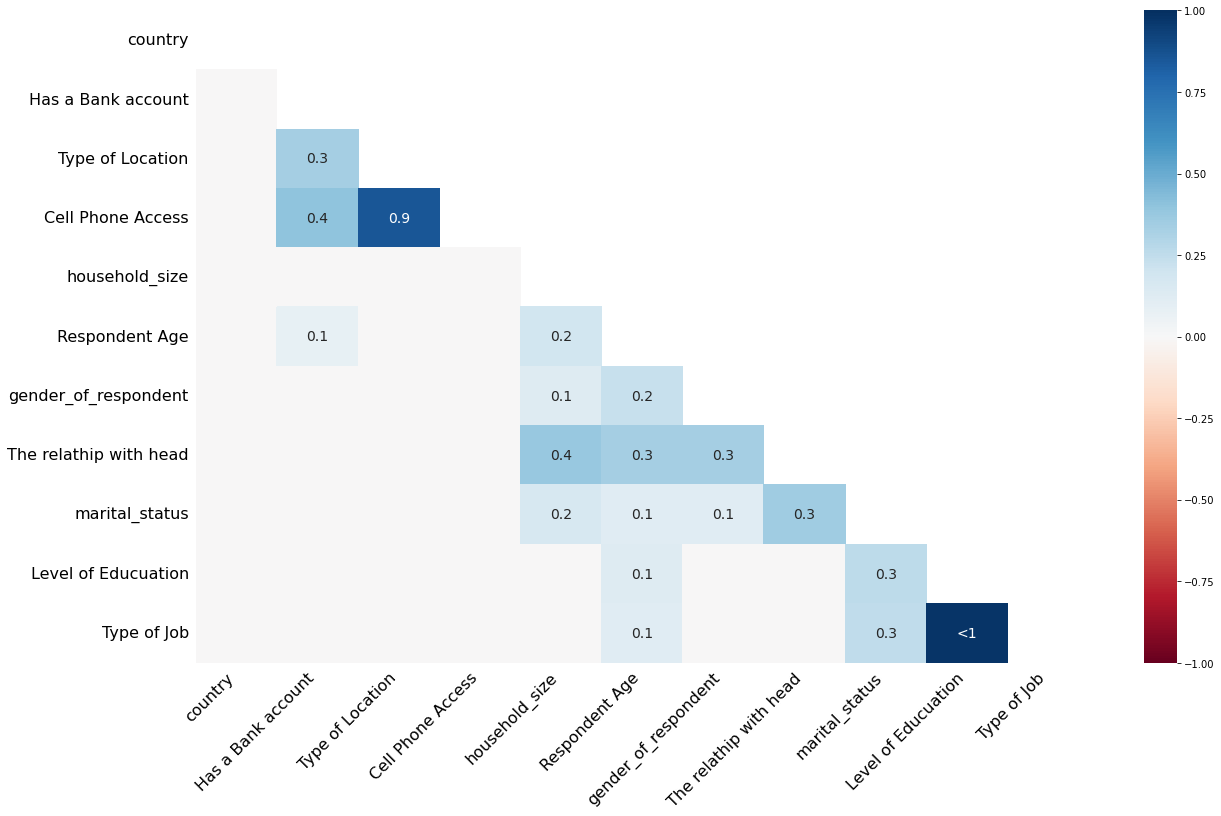

In [ ]:
##Checking the heatmap for where there are null values
msno.heatmap(Financial)

In [ ]:
#Checking for the missing values
Financial.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [ ]:
#Checking the description of the whole dataset including the categorical variables
Financial.describe(include='all')

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
count,23510,23524.000000,23524,23488,23509,23513,23496.000000,23490.000000,23490,23520,23492,23495,23494
unique,4,NaN,8735,2,2,2,NaN,NaN,2,6,5,7,10
top,Rwanda,NaN,uniqueid_1,No,Rural,Yes,NaN,NaN,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,NaN,4,20179,14338,17449,NaN,NaN,13859,12829,10739,12775,6428
mean,NaN,2016.979000,NaN,NaN,NaN,NaN,3.681818,38.804300,NaN,NaN,NaN,NaN,NaN
std,NaN,0.899669,NaN,NaN,NaN,NaN,2.279933,16.519996,NaN,NaN,NaN,NaN,NaN
min,NaN,2016.000000,NaN,NaN,NaN,NaN,0.000000,16.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2016.000000,NaN,NaN,NaN,NaN,2.000000,26.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,3.000000,35.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2018.000000,NaN,NaN,NaN,NaN,5.000000,49.000000,NaN,NaN,NaN,NaN,NaN


# 4) **Data Cleaning**

In [ ]:
#Renaming columns
Financial.rename(columns={'country':'country', 'year':'year', 'uniqueid':'uniqueid','Has a Bank account':'has_a_bank_account','Type of Location':'type_of_Location',
'Cell Phone Access':'cell_phone_access','household_size':'household_size','Respondent Age':'respondent_age','gender_of_respondent':'gender_of_respondent',
'The relathip with head':'the_relatioship_with_head','marital_status':'marital_status','Level of Educuation':'level_of_education','Type of Job':'type_of_Job'},inplace = True)
Financial.head(0)

,country,year,uniqueid,has_a_bank_account,type_of_Location,cell_phone_access,household_size,respondent_age,gender_of_respondent,the_relatioship_with_head,marital_status,level_of_education,type_of_Job


In [ ]:
# Checking for outliers
import plotly.express as px
fig = px.box(Financial, x="household_size")
fig.update_layout(
    title_text="Checking for Outliers in household size column",    
    height=800, 
    width=800)
fig.show()

In [ ]:
# Checking for outliers
import plotly.express as px
fig = px.box(Financial, x="respondent_age")
fig.update_layout(
    title_text="Checking for Outliers in respondent age column",    
    height=800, 
    width=900
)
fig.show()

**Observation**

The boxplot shows that is positively skewed as the median is closer to the bottom of the box

In [ ]:
#Checking the unique values in the year column
Financial.year.unique()

array([2018, 2029, 2056, 2016, 2039, 2017])

In [ ]:
#Deleting the year values that are greater than 2018 and saving it as an integer
column_to_delete = Financial[ (Financial['year']>2018)].index
column_to_delete

Int64Index([213, 308, 7014], dtype='int64')

In [ ]:
Financial['country'].value_counts()

Rwanda      8735
Tanzania    6606
Kenya       6068
Uganda      2101
Name: country, dtype: int64

In [ ]:
# Checking the unique values in our categorical variables
Financial = Financial[['country','year','uniqueid','has_a_bank_account','type_of_Location','cell_phone_access','household_size','respondent_age','gender_of_respondent',
                       'the_relatioship_with_head','marital_status','level_of_education','type_of_Job']]

for i in Financial.columns:
    print(Financial[i].unique())

['Kenya' 'Rwanda' 'Tanzania' nan 'Uganda']
[2018 2029 2056 2016 2039 2017]
['uniqueid_1' 'uniqueid_2' 'uniqueid_3' ... 'uniqueid_8757'
 'uniqueid_8758' 'uniqueid_8759']
['Yes' 'No' nan]
['Rural' 'Urban' nan]
['Yes' 'No' nan]
[ 3.  5.  8.  7.  1.  6.  4. 10.  2. 11.  9. 12. 16. 15. 13. 14. 21. nan
  0. 18. 17. 20.]
[ 24.  70.  26.  34.  32.  42.  54.  76.  40.  69.  64.  31.  38.  47.
  27.  48.  25.  21.  18.  22.  58.  55.  62.  29.  35.  45.  67.  19.
  80.  66.  50.  33.  28.  51.  16.  17.  30.  37.  59.  65.  46.  56.
  52.  23.  43.  49.  44.  72.  53.  63.  39.  81.  78.  36.  20.  60.
  95.  71.  57.  85.  68.  41.  61.  75.  86.  73.  nan  93.  74.  88.
  90.  77.  84.  82.  89.  79.  83.  94.  87.  92.  91.  98.  97.  96.
  99. 100.]
['Female' 'Male' nan]
['Spouse' 'Head of Household' 'Other relative' 'Child' 'Parent'
 'Other non-relatives' nan]
['Married/Living together' 'Widowed' 'Single/Never Married'
 'Divorced/Seperated' 'Dont know' nan]
['Secondary education' 'No formal

In [ ]:
Financial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   country                    23510 non-null  object 
 1   year                       23524 non-null  int64  
 2   uniqueid                   23524 non-null  object 
 3   has_a_bank_account         23488 non-null  object 
 4   type_of_Location           23509 non-null  object 
 5   cell_phone_access          23513 non-null  object 
 6   household_size             23496 non-null  float64
 7   respondent_age             23490 non-null  float64
 8   gender_of_respondent       23490 non-null  object 
 9   the_relatioship_with_head  23520 non-null  object 
 10  marital_status             23492 non-null  object 
 11  level_of_education         23495 non-null  object 
 12  type_of_Job                23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usa

In [ ]:
#Replacing the missing values in the age column with the mean
Financial['respondent_age'] = Financial['respondent_age'].fillna(Financial['respondent_age'].median())

In [ ]:
Financial['country'] = Financial['country'].replace (np.nan, 'Unknown')

In [ ]:
Financial = Financial.dropna(subset=['has_a_bank_account'])

In [ ]:
Financial['type_of_Location'] = Financial['type_of_Location'].replace (np.nan, 'Unknown')

In [ ]:
Financial['cell_phone_access'] = Financial['cell_phone_access'].fillna(Financial['cell_phone_access'].mode())

In [ ]:
Financial['household_size'] = Financial['household_size'].fillna(Financial['household_size'].median())

In [ ]:
Financial['gender_of_respondent'] = Financial['gender_of_respondent'].replace (np.nan, 'Unknown')

In [ ]:
Financial['marital_status'] = Financial['marital_status'].replace (np.nan, 'Unknown')

In [ ]:
Financial['level_of_education'] = Financial['level_of_education'].replace (np.nan, 'Unknown')

In [ ]:
Financial['type_of_Job'] = Financial['type_of_Job'].replace (np.nan, 'Unknown')

# 5) Exploratory Data Analysis


> # a) Univariate Analysis



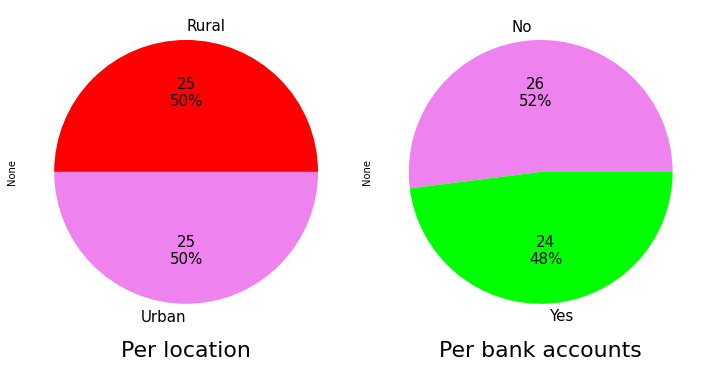

In [ ]:
# Understanding the location and bank account distribution
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'
N = 50
df = pd.DataFrame({'type_of_Location': np.random.choice(['Rural','Urban'], N),
                   'has_a_bank_account': np.random.choice(['Yes', 'No'], N)})

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 15))

df.groupby('type_of_Location').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 15},
                                  colors=['red','violet'], ax=ax1)
df.groupby('has_a_bank_account').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 15},
                                 colors=['violet', 'lime'], ax=ax2)
ax1.set_xlabel('Per location', size=22)
ax2.set_xlabel('Per bank accounts', size=22)
plt.tight_layout()
plt.show()

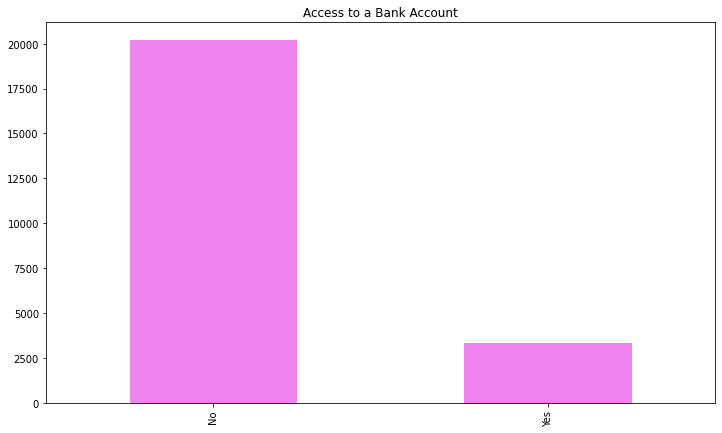

In [ ]:
figsize=(8, 9)
Financial['has_a_bank_account'].value_counts().plot.bar(title="Access to a Bank Account", figsize=(12, 7), color='violet')

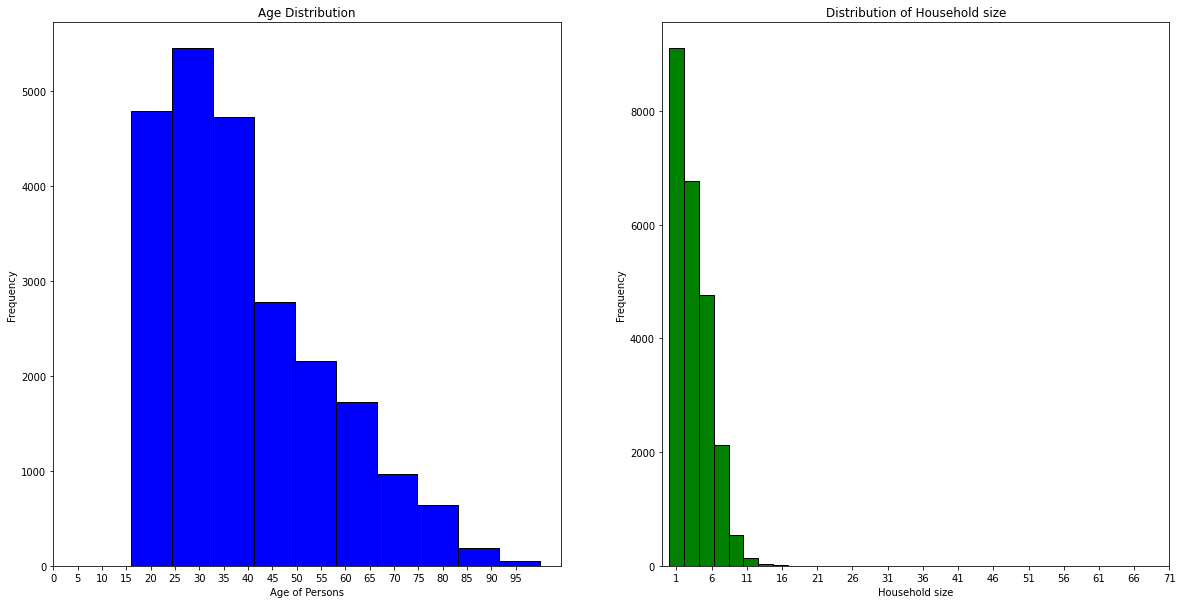

In [ ]:
# Checking the distribution of patients age and Household size using histogram
#
fig,ax=plt.subplots(1,2,figsize=(20,10))
Financial['respondent_age'].plot.hist(ax=ax[0],bins=10,edgecolor='black',color='blue')
ax[0].set_title('Age Distribution')
ax[0].set_xlabel('Age of Persons')
x1=list(range(0,100,5))
ax[0].set_xticks(x1)
Financial['household_size'].plot.hist(ax=ax[1],color='green',bins=10,edgecolor='black')
ax[1].set_title('Distribution of Household size')
ax[1].set_xlabel('Household size')
x2=list(range(1,75,5))
ax[1].set_xticks(x2)
plt.show()

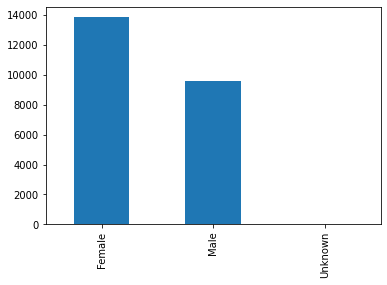

In [ ]:
#Distribution of gender
Financial['gender_of_respondent'].value_counts().plot(kind='bar')

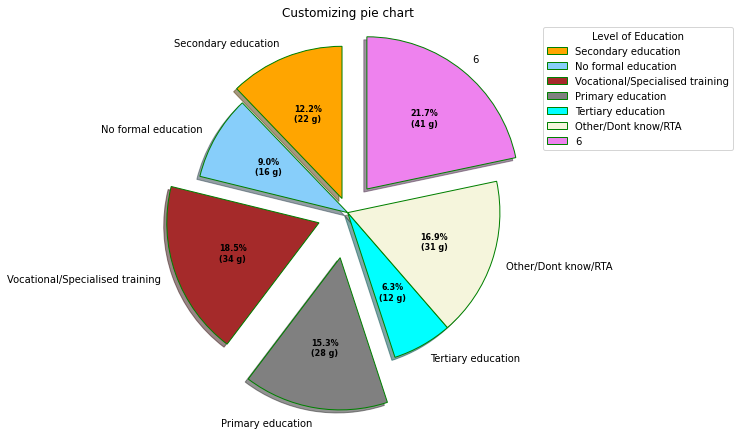

In [ ]:
#Exploding pie chart for the level of education
# Creating dataset
level_of_education = ['Secondary education','No formal education',
 'Vocational/Specialised training','Primary education',
 'Tertiary education','Other/Dont know/RTA','6']
 
data = [23, 17, 35, 29, 12, 32, 41]

# Creating explode data
explode = (0.1, 0.0, 0.2, 0.3, 0.0, 0.0,0.2)
 
# Creating color parameters
colors = ( "orange", "lightskyblue", "brown",
          "grey", "cyan", "beige","violet")
 
# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }
 
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct,data),
                                  explode = explode,
                                  labels = level_of_education,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
 
# Adding legend
ax.legend(wedges, level_of_education,
          title ="Level of Education",
          loc ="upper left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Customizing pie chart")
 
# show plot
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

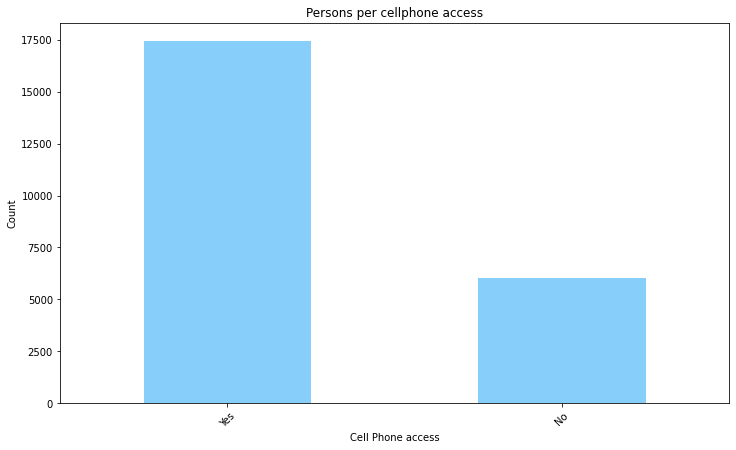

In [ ]:
# A bar graph for checking persons with access to cell phones
#
Financial['cell_phone_access'].value_counts().plot.bar(rot=45, figsize=(12,7), color='lightskyblue')
plt.title('Persons per cellphone access')
plt.xlabel('Cell Phone access')
plt.ylabel('Count')
plt.show

> # b) Bivariate Analysis

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

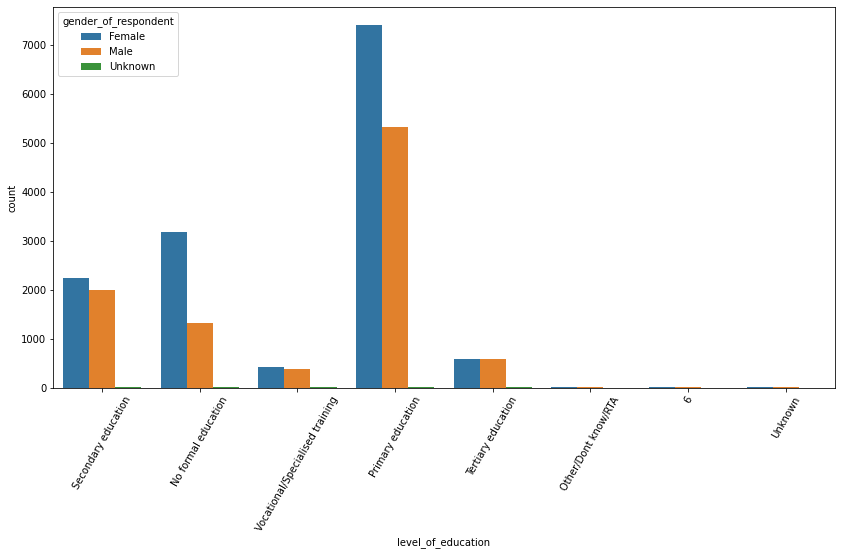

In [ ]:
# Comparing the gender of respondent to the level of education
fig = plt.figure(figsize=(14,7))
sns.countplot(x = 'level_of_education', hue='gender_of_respondent',data=Financial)
plt.xticks(rotation=60) 

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

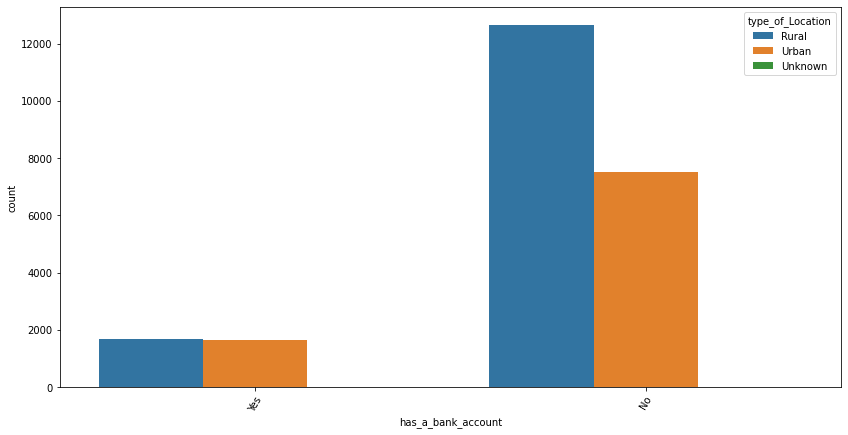

In [ ]:
# Comparing the type of location to the has bank account variable
fig = plt.figure(figsize=(14,7))
sns.countplot(x = 'has_a_bank_account', hue='type_of_Location',data=Financial)
plt.xticks(rotation=60) 

> # c) Multivariate Analysis

In [ ]:
#Installing dython that will help with running a correlation matrix that includes the categorical variables
!pip install dython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 63.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 78.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 KB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 96.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.0/296.0 KB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 64.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 15.4 MB/s eta 0:00:00
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21

In [ ]:
import pandas as pd
from dython.nominal import associations

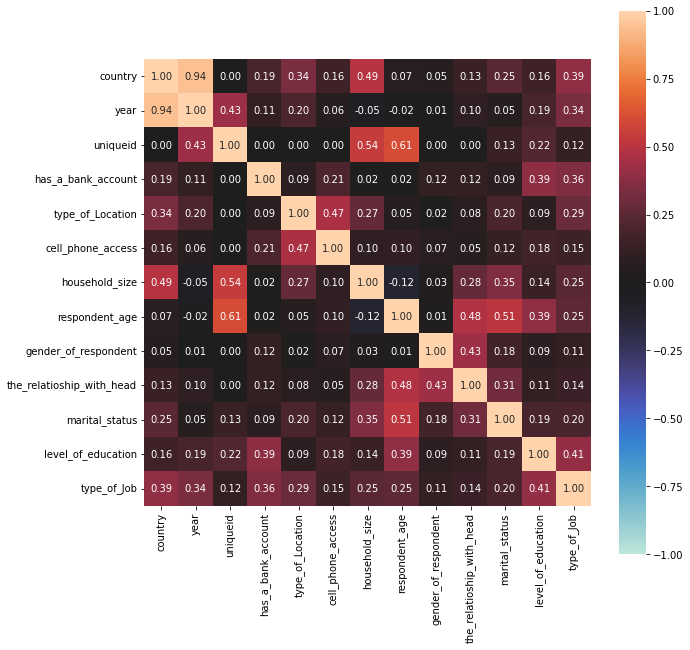

In [ ]:
# Creating a correlation matrix that includes the categorical variables
complete_correlation= associations(Financial, filename= 'complete_correlation.png', figsize=(10,10))

## Data Pre -processing

In [ ]:
#Confirming that there are no null values
Financial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23488 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   country                    23488 non-null  object 
 1   year                       23488 non-null  int64  
 2   uniqueid                   23488 non-null  object 
 3   has_a_bank_account         23488 non-null  object 
 4   type_of_Location           23488 non-null  object 
 5   cell_phone_access          23485 non-null  object 
 6   household_size             23488 non-null  float64
 7   respondent_age             23488 non-null  float64
 8   gender_of_respondent       23488 non-null  object 
 9   the_relatioship_with_head  23484 non-null  object 
 10  marital_status             23488 non-null  object 
 11  level_of_education         23488 non-null  object 
 12  type_of_Job                23488 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usa

In [ ]:
#Performing label encoding for categorical columns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()
encoded1=le.fit_transform(Financial['country'])

encoded2=le.fit_transform(Financial['has_a_bank_account'])

encoded3=le.fit_transform(Financial['type_of_Location'])

encoded4=le.fit_transform(Financial['cell_phone_access'])

encoded5=le.fit_transform(Financial['gender_of_respondent'])

encoded6=le.fit_transform(Financial['the_relatioship_with_head'])

encoded7=le.fit_transform(Financial['marital_status'])

encoded8=le.fit_transform(Financial['level_of_education'])

encoded9=le.fit_transform(Financial['type_of_Job'])

In [ ]:
#Droping the categorical columns for appending
Financial1=Financial.drop(columns=['country','has_a_bank_account','type_of_Location','cell_phone_access','gender_of_respondent','the_relatioship_with_head','marital_status','level_of_education','type_of_Job'])
Financial1

,year,uniqueid,household_size,respondent_age
0,2018,uniqueid_1,3.0,24.0
1,2018,uniqueid_2,5.0,70.0
2,2018,uniqueid_3,5.0,26.0
3,2018,uniqueid_4,5.0,34.0
4,2018,uniqueid_5,8.0,26.0
...,...,...,...,...
23519,2018,uniqueid_2113,4.0,48.0
23520,2018,uniqueid_2114,2.0,27.0
23521,2018,uniqueid_2115,5.0,27.0
23522,2018,uniqueid_2116,7.0,30.0


In [ ]:

Financial1['country']=encoded1

Financial1['has_a_bank_account']=encoded2

Financial1['type_of_Location']=encoded3

Financial1['cell_phone_access']=encoded4

Financial1['gender_of_respondent']=encoded5

Financial1['the_relatioship_with_head']=encoded6

Financial1['marital_status']=encoded7

Financial1['level_of_education']=encoded8

Financial1['type_of_Job']=encoded9

Financial1

,year,uniqueid,household_size,respondent_age,country,has_a_bank_account,type_of_Location,cell_phone_access,gender_of_respondent,the_relatioship_with_head,marital_status,level_of_education,type_of_Job
0,2018,uniqueid_1,3.0,24.0,0,1,0,1,0,5,2,4,9
1,2018,uniqueid_2,5.0,70.0,0,0,0,0,0,1,5,1,4
2,2018,uniqueid_3,5.0,26.0,0,1,2,1,1,3,3,7,9
3,2018,uniqueid_4,5.0,34.0,0,0,0,1,0,1,2,3,3
4,2018,uniqueid_5,8.0,26.0,0,0,2,0,1,0,3,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,2018,uniqueid_2113,4.0,48.0,3,0,0,1,0,1,0,1,7
23520,2018,uniqueid_2114,2.0,27.0,3,0,0,1,0,1,3,4,7
23521,2018,uniqueid_2115,5.0,27.0,3,0,0,1,0,4,5,3,7
23522,2018,uniqueid_2116,7.0,30.0,3,0,2,1,0,4,0,4,9


The data has been transformed into numerical as follows:

has_a_bank_account:

1 = Yes, 0 = No

In [ ]:
Financial['has_a_bank_account'].value_counts()


No     20179
Yes     3309
Name: has_a_bank_account, dtype: int64

In [ ]:
Financial1['country'].value_counts()


1    8735
2    6570
0    6068
3    2101
4      14
Name: country, dtype: int64

In [ ]:
Financial1['has_a_bank_account'].value_counts()


0    20179
1     3309
Name: has_a_bank_account, dtype: int64

In [ ]:
# Convert catergorical data to Numerical for modeling
#from sklearn.preprocessing import LabelEncoder

# instantiate labelencoder object
#le = LabelEncoder()

# apply le on categorical feature columns
#categorical_cols = ['country','has_a_bank_account','type_of_Location','cell_phone_access','gender_of_respondent','the_relatioship_with_head','marital_status','level_of_education','type_of_Job']
#Financial2 = Financial[categorical_cols].apply(lambda col: le.fit_transform(col))
#Financial.head(5)


In [ ]:
#Checking the datatypes present in the dataset
Financial1.dtypes

year                           int64
uniqueid                      object
household_size               float64
respondent_age               float64
country                        int64
has_a_bank_account             int64
type_of_Location               int64
cell_phone_access              int64
gender_of_respondent           int64
the_relatioship_with_head      int64
marital_status                 int64
level_of_education             int64
type_of_Job                    int64
dtype: object

In [ ]:
Financial1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23488 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       23488 non-null  int64  
 1   uniqueid                   23488 non-null  object 
 2   household_size             23488 non-null  float64
 3   respondent_age             23488 non-null  float64
 4   country                    23488 non-null  int64  
 5   has_a_bank_account         23488 non-null  int64  
 6   type_of_Location           23488 non-null  int64  
 7   cell_phone_access          23488 non-null  int64  
 8   gender_of_respondent       23488 non-null  int64  
 9   the_relatioship_with_head  23488 non-null  int64  
 10  marital_status             23488 non-null  int64  
 11  level_of_education         23488 non-null  int64  
 12  type_of_Job                23488 non-null  int64  
dtypes: float64(2), int64(10), object(1)
memory usa

In [ ]:
#Converting float datatypes to Integer
Financial1['household_size'] = Financial1['household_size'].astype(int)
Financial1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23488 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       23488 non-null  int64  
 1   uniqueid                   23488 non-null  object 
 2   household_size             23488 non-null  int64  
 3   respondent_age             23488 non-null  float64
 4   country                    23488 non-null  int64  
 5   has_a_bank_account         23488 non-null  int64  
 6   type_of_Location           23488 non-null  int64  
 7   cell_phone_access          23488 non-null  int64  
 8   gender_of_respondent       23488 non-null  int64  
 9   the_relatioship_with_head  23488 non-null  int64  
 10  marital_status             23488 non-null  int64  
 11  level_of_education         23488 non-null  int64  
 12  type_of_Job                23488 non-null  int64  
dtypes: float64(1), int64(11), object(1)
memory usa

In [ ]:
#Converting float datatypes to Integer
Financial1['respondent_age'] = Financial1['respondent_age'].astype(int)
Financial1

,year,uniqueid,household_size,respondent_age,country,has_a_bank_account,type_of_Location,cell_phone_access,gender_of_respondent,the_relatioship_with_head,marital_status,level_of_education,type_of_Job
0,2018,uniqueid_1,3,24,0,1,0,1,0,5,2,4,9
1,2018,uniqueid_2,5,70,0,0,0,0,0,1,5,1,4
2,2018,uniqueid_3,5,26,0,1,2,1,1,3,3,7,9
3,2018,uniqueid_4,5,34,0,0,0,1,0,1,2,3,3
4,2018,uniqueid_5,8,26,0,0,2,0,1,0,3,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,2018,uniqueid_2113,4,48,3,0,0,1,0,1,0,1,7
23520,2018,uniqueid_2114,2,27,3,0,0,1,0,1,3,4,7
23521,2018,uniqueid_2115,5,27,3,0,0,1,0,4,5,3,7
23522,2018,uniqueid_2116,7,30,3,0,2,1,0,4,0,4,9


In [ ]:
#Dropping unwanted columns
Financial1.drop(['uniqueid','the_relatioship_with_head'], axis = 1, inplace= True)
Financial1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23488 entries, 0 to 23523
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   year                  23488 non-null  int64
 1   household_size        23488 non-null  int64
 2   respondent_age        23488 non-null  int64
 3   country               23488 non-null  int64
 4   has_a_bank_account    23488 non-null  int64
 5   type_of_Location      23488 non-null  int64
 6   cell_phone_access     23488 non-null  int64
 7   gender_of_respondent  23488 non-null  int64
 8   marital_status        23488 non-null  int64
 9   level_of_education    23488 non-null  int64
 10  type_of_Job           23488 non-null  int64
dtypes: int64(11)
memory usage: 2.7 MB


##TRAIN,TEST AND SPLIT

In [ ]:
# Splitting the dataset into train and test using train test split
# We will use a test size of 20%
#
from sklearn.model_selection import train_test_split

X=Financial1.drop('has_a_bank_account',axis=1)
y=Financial1['has_a_bank_account']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=0)

In [ ]:
# Checking the shapes of our feature variables
X.shape, X_train.shape, X_test.shape

((23488, 10), (18790, 10), (4698, 10))

**Observations**
> Our feature variables have 23524 rows and 10 columns, X_train has 18819 rows and 10 columns and X_test has 4705 rows and 10 columns.

In [ ]:
# Checking the shapes of our target variable
y.shape, y_train.shape, y_test.shape

((23488,), (18790,), (4698,))

**Observations**
> Our target variables have 23524 rows y_train has 18819 rows  and y_test has 4705 rows.

In [ ]:
# Checking the target variable to see if the classes are balanced
#
y_train.value_counts()

0    16151
1     2639
Name: has_a_bank_account, dtype: int64

**Observations**

> The output shows that 16182 do not have bank accounts while only 2610 have . This means that our target variable is imbalanced.

### **Normalization of data**

In [ ]:
# We will normalize our data by using StandardScaler
# Initialize the scaler
#
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fitting the scaler
scaler.fit(X_train)

# Applying the transformation to the data
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

> # c) Implementing the Solution
## Neural Network

In [ ]:
#Importing libraries
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(0)

Importing the libraries needed for tensorflow.We imported Keras as it is a high api level for tensorflow.
Also we import tensorflow as we are using neural network algorithm

In [ ]:
#Building the model
My_model = keras.Sequential([
    keras.layers.Dense(units=80, activation='relu'),
    keras.layers.Dense(units=60, activation='relu'),
    #keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=1, activation='sigmoid')
])

Converted the 2D array to a 1D array.The parameter units set the number of neurons(units) for each layer.Then we use the relu activation function on the layers to decide the opinion of each neuoron should be taken to what account and to what degree.Also Relu was preffered as it does not have  vanishing gradient hence improving the accuracy of the model.And also preffered in input layers as compared to other activation functions that are used in the output layer.Then we used sigmoid in the output layer as we are building a binary classifier and that our dataset is a predictive analysis.We used 2 layers as we have two values 0 and 1.

In [ ]:
#Training the model
My_model.compile(optimizer='adam',
    loss=tf.keras.losses.binary_crossentropy,
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
    ])
history = My_model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
588/588 [==============================] - 2s 2ms/step - loss: 0.3199 - accuracy: 0.8703 - precision: 0.6115 - recall: 0.2088
Epoch 2/10
588/588 [==============================] - 1s 2ms/step - loss: 0.3005 - accuracy: 0.8773 - precision: 0.6491 - recall: 0.2747
Epoch 3/10
588/588 [==============================] - 1s 2ms/step - loss: 0.2971 - accuracy: 0.8790 - precision: 0.6535 - recall: 0.2944
Epoch 4/10
588/588 [==============================] - 1s 2ms/step - loss: 0.2939 - accuracy: 0.8790 - precision: 0.6495 - recall: 0.3005
Epoch 5/10
588/588 [==============================] - 1s 2ms/step - loss: 0.2914 - accuracy: 0.8808 - precision: 0.6572 - recall: 0.3168
Epoch 6/10
588/588 [==============================] - 1s 2ms/step - loss: 0.2904 - accuracy: 0.8816 - precision: 0.6638 - recall: 0.3187
Epoch 7/10
588/588 [==============================] - 1s 2ms/step - loss: 0.2883 - accuracy: 0.8808 - precision: 0.6592 - recall: 0.3138
Epoch 8/10
588/588 [=====================

In [ ]:
#Making predictions
predictions= np.argmax(My_model.predict(X_test), axis=-1)
predictions

147/147 [==============================] - 0s 1ms/step


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Evaluating the model
from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix = confusion_matrix(y_test, predictions)
print(confusion_matrix)

# Looking at the classification report
print(classification_report(y_test, predictions))

[[4028    0]
 [ 670    0]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      4028
           1       0.00      0.00      0.00       670

    accuracy                           0.86      4698
   macro avg       0.43      0.50      0.46      4698
weighted avg       0.74      0.86      0.79      4698



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



**a**.The confusion matrix shows that 4028 and 0 are the number of correct predictions whereas 670 and 0 are the number of wrong predictions.

**b**.The model has a precision score of 86% and 0,a recall of 100% and 0 and an f1 score of 92% and 0.

> # c) Challenging the Solution

In [ ]:
# import SMOTE oversampling
from collections import Counter
from imblearn.over_sampling import SMOTE

# summarize class distribution
print("Before oversampling: ",Counter(y_train))

# define oversampling strategy
SMOTE = SMOTE()

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

# summarize class distribution
print("After oversampling: ",Counter(y_train_SMOTE))

Before oversampling:  Counter({0: 16151, 1: 2639})
After oversampling:  Counter({0: 16151, 1: 16151})


I used SMOTE for solving imbalancing in the dataset.Hence the output shows that imbalancing has been solved thus dataset is balanced.

In [ ]:
#Challenging the model after solving imbalancing
#Building the model
My_model2 = keras.Sequential([
    keras.layers.Dense(units=80, activation='relu'),
    keras.layers.Dense(units=60, activation='relu'),
    #keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=1, activation='sigmoid')
])

In [ ]:
#Training the model
My_model2.compile(optimizer='adam',
    loss=tf.keras.losses.binary_crossentropy,
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
    ])
history2 = My_model2.fit(X_train_SMOTE, y_train_SMOTE, epochs = 10)

Epoch 1/10
1010/1010 [==============================] - 3s 2ms/step - loss: 0.4863 - accuracy: 0.7618 - precision: 0.7541 - recall: 0.7769
Epoch 2/10
1010/1010 [==============================] - 2s 2ms/step - loss: 0.4576 - accuracy: 0.7833 - precision: 0.7776 - recall: 0.7935
Epoch 3/10
1010/1010 [==============================] - 2s 2ms/step - loss: 0.4458 - accuracy: 0.7890 - precision: 0.7813 - recall: 0.8025
Epoch 4/10
1010/1010 [==============================] - 2s 2ms/step - loss: 0.4382 - accuracy: 0.7932 - precision: 0.7883 - recall: 0.8017
Epoch 5/10
1010/1010 [==============================] - 2s 2ms/step - loss: 0.4321 - accuracy: 0.7966 - precision: 0.7922 - recall: 0.8042
Epoch 6/10
1010/1010 [==============================] - 2s 2ms/step - loss: 0.4266 - accuracy: 0.7986 - precision: 0.7919 - recall: 0.8100
Epoch 7/10
1010/1010 [==============================] - 2s 2ms/step - loss: 0.4218 - accuracy: 0.8018 - precision: 0.7949 - recall: 0.8136
Epoch 8/10
1010/1010 [=====

In [ ]:
#Making predictions
predictions= My_model2.predict(X_test)

# extract the predicted class labels
predictions_new = np.where(predictions > 0.5, 1, 0)

147/147 [==============================] - 0s 1ms/step


In [ ]:
# Evaluating the model
from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix = confusion_matrix(y_test, predictions_new)
print(confusion_matrix)

# Looking at the classification report
print(classification_report(y_test, predictions_new))

[[3245  783]
 [ 189  481]]
              precision    recall  f1-score   support

           0       0.94      0.81      0.87      4028
           1       0.38      0.72      0.50       670

    accuracy                           0.79      4698
   macro avg       0.66      0.76      0.68      4698
weighted avg       0.86      0.79      0.82      4698



# **8. Follow up questions**

### a). Did we have the right data?

The given data was relevant in answering our research question as we were able to effectively investigate the given variables and gain insights on the characteristics of people who have bank accounts.

### b). Do we need other data to answer our question?
In order for us to get a clear view of why most people do not have bank accounts we would need more variables

### c). Did we have the right question?
Our question was right because it enabled us have correct objectives that enabled us create a model that would predict which individuals have bank accounts and those who do not have.

# **9. Recommendations**

1. Educate people in the rural areas about banking and having accounts.

2. Male gender should know the benefits of having a bank account

3. Encourage the male gender the  benefits of education and also educate them on the benefits of having bank accounts.

# **10. Conclusion**


The purpose of the model was to predict the type of individuals who have/use bank accounts.This is by comparing the different variables against access to bank accounts.

 This model would have performed better with presence of more variables to compare.